In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
from header.time import getHourFromStr
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
df_jan = pd.read_csv('./data/yellow_tripdata_2009-01.csv')
df_feb = pd.read_csv('./data/yellow_tripdata_2009-02.csv')
df_mar = pd.read_csv('./data/yellow_tripdata_2009-03.csv')

df = pd.concat([df_jan, df_feb, df_mar], axis = 0)

In [ ]:
df = pd.read_csv('./data/yellow_tripdata_2009-01_03.csv')

In [2]:
df = pd.read_pickle('./data/yellow_tripdata_2009-01_03.pkl')

In [ ]:
df.head(5)

In [ ]:
df['region'][0][0]

# Hw1
## What regions have the most pickups?
    1. Combine Longitude and Latitude
    2. sort
    
    ans: [(0, 0), (-73.137393, 41.366138), (-73.951818, 40.733697), (-73.98853699999998, 40.698458), (-73.989039, 40.75808)]

In [ ]:
# What regions have the most pickups?
region = [(i, j) for i, j in zip(df['Start_Lon'], df['Start_Lat'])]
df['region'] = region

count = np.unique(df['region'], return_counts = True)
top5_idx = np.argsort(count[1])[:: -1][: 5]
top5_region = count[0][top5_idx]
print(top5_region)

## When are the peak hours and off-peak hours for taking a taxi?
    1. Get hour from string
    ans: 19:00

In [ ]:
hour = df['Trip_Pickup_DateTime'].apply(getHourFromStr)
df['hour'] = hour
count = np.unique(hour, return_counts = True)
top5_idx = np.argsort(count[1])[:: -1][: 5]
top5_hour = count[0][top5_idx]

In [ ]:
print(top5_hour)

## What are the differences between big and small total amounts when taking a taxi?

In [39]:
# turn total amounts from continual to discrete
group_names = [1, 2, 3, 4]
cats = pd.qcut(df['Total_Amt'], 4, labels = group_names)
df['Total_Amt_group'] = cats

# get low total amount and high total amount
target = 'Total_Amt_group'
low = df[df[target] == 1].reset_index()
high = df[df[target] == 4].reset_index()

low_high = pd.concat([low, high]).reset_index()

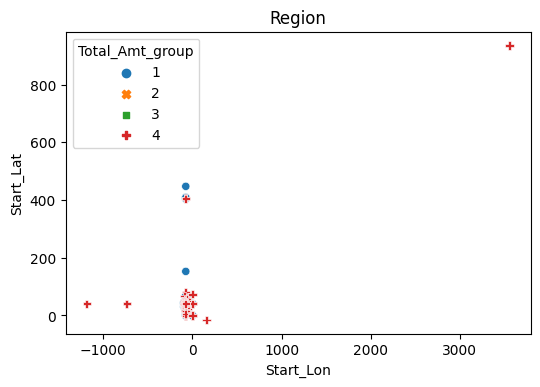

In [40]:
plt.figure(dpi = 100)
plt.title('Region')
sbn.scatterplot(data = low_high, x = 'Start_Lon', y = 'Start_Lat', hue = 'Total_Amt_group', style = 'Total_Amt_group')

plt.show()

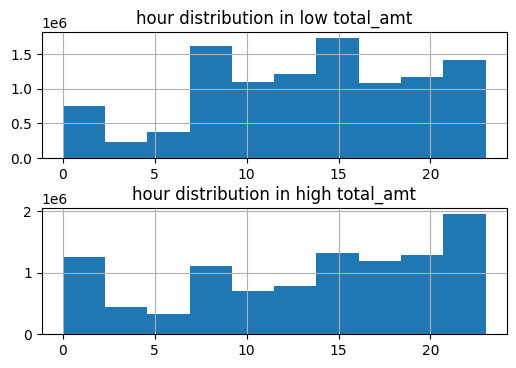

In [41]:
plt.figure(dpi = 100)
plt.subplot(211)
plt.title('hour distribution in low total_amt')
low['hour'].hist()

plt.subplot(212)
plt.title('hour distribution in high total_amt')
high['hour'].hist()

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

plt.show()

In [9]:
df.head(4)

vendor_name Trip_Pickup_DateTime Trip_Dropoff_DateTime  Passenger_Count  \
0         VTS  2009-01-04 02:52:00   2009-01-04 03:02:00                1   
1         VTS  2009-01-04 03:31:00   2009-01-04 03:38:00                3   
2         VTS  2009-01-03 15:43:00   2009-01-03 15:57:00                5   
3         DDS  2009-01-01 20:52:58   2009-01-01 21:14:00                1   

   Trip_Distance  Start_Lon  Start_Lat  Rate_Code  store_and_forward  \
0           2.63 -73.991957  40.721567        NaN                NaN   
1           4.55 -73.982102  40.736290        NaN                NaN   
2          10.35 -74.002587  40.739748        NaN                NaN   
3           5.00 -73.974267  40.790955        NaN                NaN   

     End_Lon  ...  Payment_Type Fare_Amt  surcharge  mta_tax  Tip_Amt  \
0 -73.993803  ...          Cash      8.9        0.5      NaN     0.00   
1 -73.955850  ...           NaN     12.1        0.5      NaN     2.00   
2 -73.869983  ...           NaN     23.7        0.0      NaN     4.74   
3 -73.996558  ...        Credit     14.9        0.5      NaN     3.05   

   Tolls_Amt  Total_Amt                   region hour  Total_Amt_group  
0        0.0       9.40  (-73.991957, 40.721567)    2                3  
1        0.0      14.60   (-73.982102, 40.73629)    3                4  
2        0.0      28.44  (-74.002587, 40.739748)   15                4  
3        0.0      18.45  (-73.974267, 40.790955)   20                4  

[4 rows x 21 columns]

In [ ]:
np.unique(df['Payment_Type'])

In [8]:
df['Payment_Type'] = df['Payment_Type'].map({'CASH': 'Cash', 'CREDIT': 'Credit'})

In [42]:
df.to_pickle('./data/yellow_tripdata_2009-01_03.pkl')